# ToolBox Loading

In [224]:
#Data Manipulation
import numpy as np
import pandas as pd

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

#Feature Engineering
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

#Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

#Model evaluation
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score

#Warnings
import warnings
warnings.filterwarnings('ignore')

# Data Exploration

In [191]:
#loading dataset and checking shape
df = pd.read_csv(r'C:\Users\USER1\Desktop\exercise.csv')
df.shape

(15000, 8)

In [192]:
#top five rows in dataset
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [193]:
#loading additional dataset and checking shape
calories = pd.read_csv(r'C:\Users\USER1\Desktop\calories.csv')
calories.shape

(15000, 2)

In [194]:
#top five rows in additional dataset
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [195]:
#joining datasets
df = df.merge(calories,on='User_ID') 
df.shape

(15000, 9)

In [196]:
#showing columns in new dataset
df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [197]:
#showing top five rows in dataset
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [198]:
#showing bottom five rows in dataset
df.tail()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0
14999,11751526,male,63,173.0,79.0,18.0,92.0,40.5,98.0


In [199]:
#showing statistical description of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,15000.0,1.497736e+07,2.872851e+06,10001159.0,12474190.75,14997285.0,17449278.75,19999647.0
Age,15000.0,4.278980e+01,1.698026e+01,20.0,28.00,39.0,56.00,79.0
Height,15000.0,1.744651e+02,1.425811e+01,123.0,164.00,175.0,185.00,222.0
Weight,15000.0,7.496687e+01,1.503566e+01,36.0,63.00,74.0,87.00,132.0
Duration,15000.0,1.553060e+01,8.319203e+00,1.0,8.00,16.0,23.00,30.0
Heart_Rate,15000.0,9.551853e+01,9.583328e+00,67.0,88.00,96.0,103.00,128.0
Body_Temp,15000.0,4.002545e+01,7.792299e-01,37.1,39.60,40.2,40.60,41.5
Calories,15000.0,8.953953e+01,6.245698e+01,1.0,35.00,79.0,138.00,314.0


In [200]:
#showing information regarding dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.1+ MB


# Data Cleaning

In [201]:
#checking for null inputs
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [202]:
df.drop(columns = 'User_ID',inplace=True)


In [203]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


# Exploratory Data Analysis

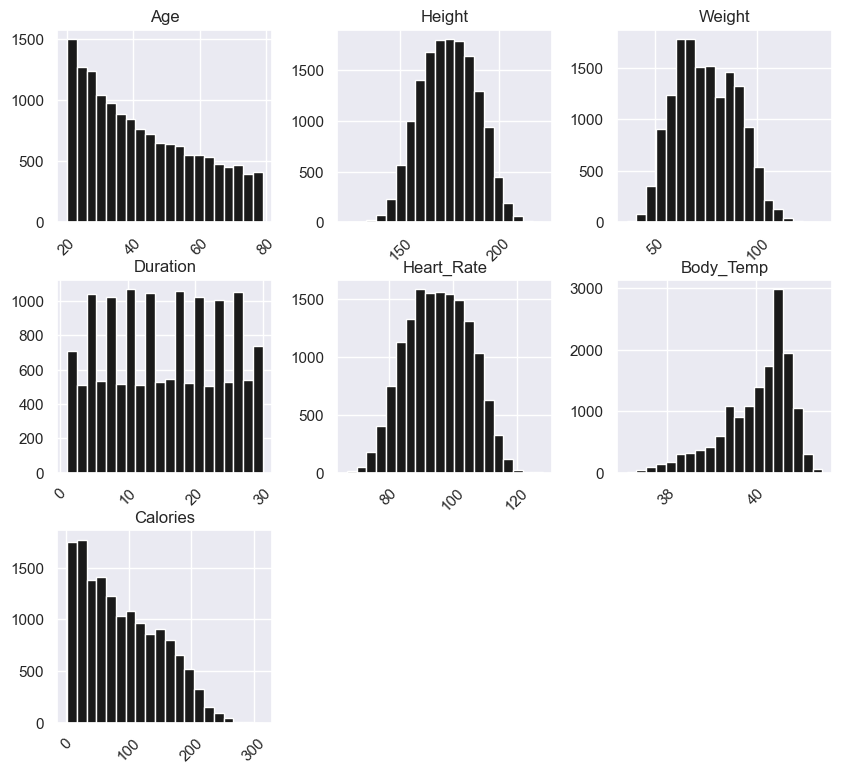

In [204]:
#histogram of numeric features in dataset
df.hist(figsize=(10,9), xrot=45,color = 'k',bins =20)
plt.show()

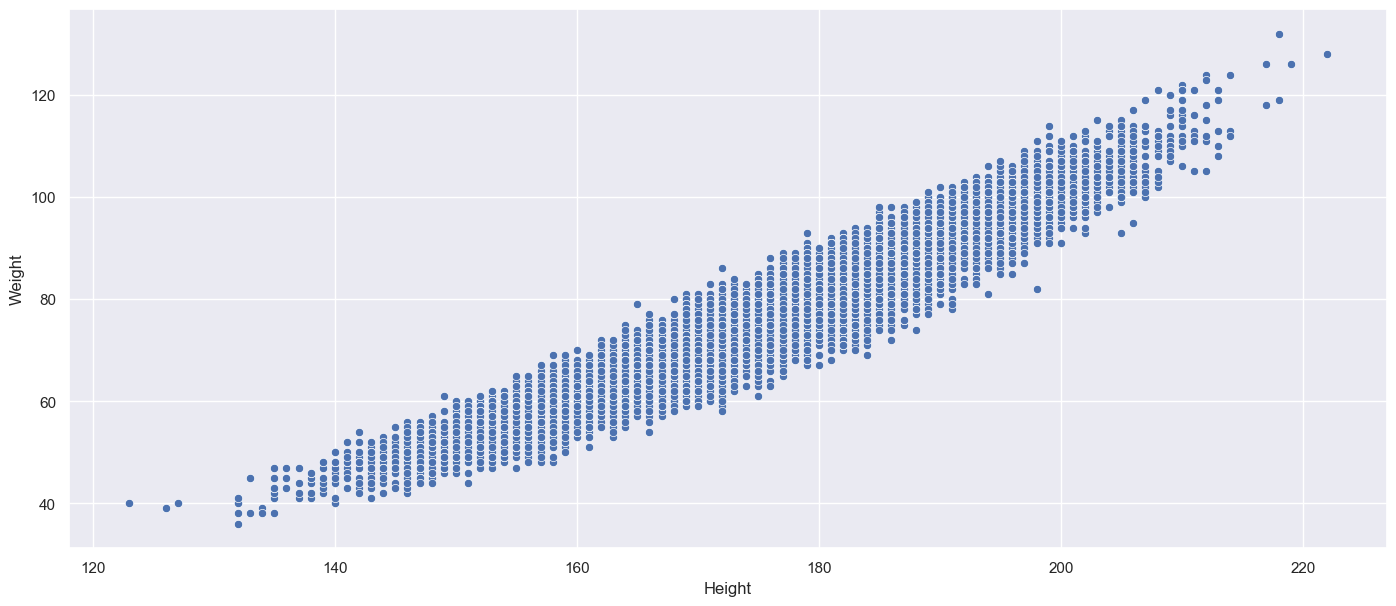

In [205]:
#scatter plot showing relationship between height and weight
plt.subplots(figsize = (17,7))
sns.set(style='darkgrid')
sns.scatterplot(x=df['Height'],y=df['Weight'])
plt.show()

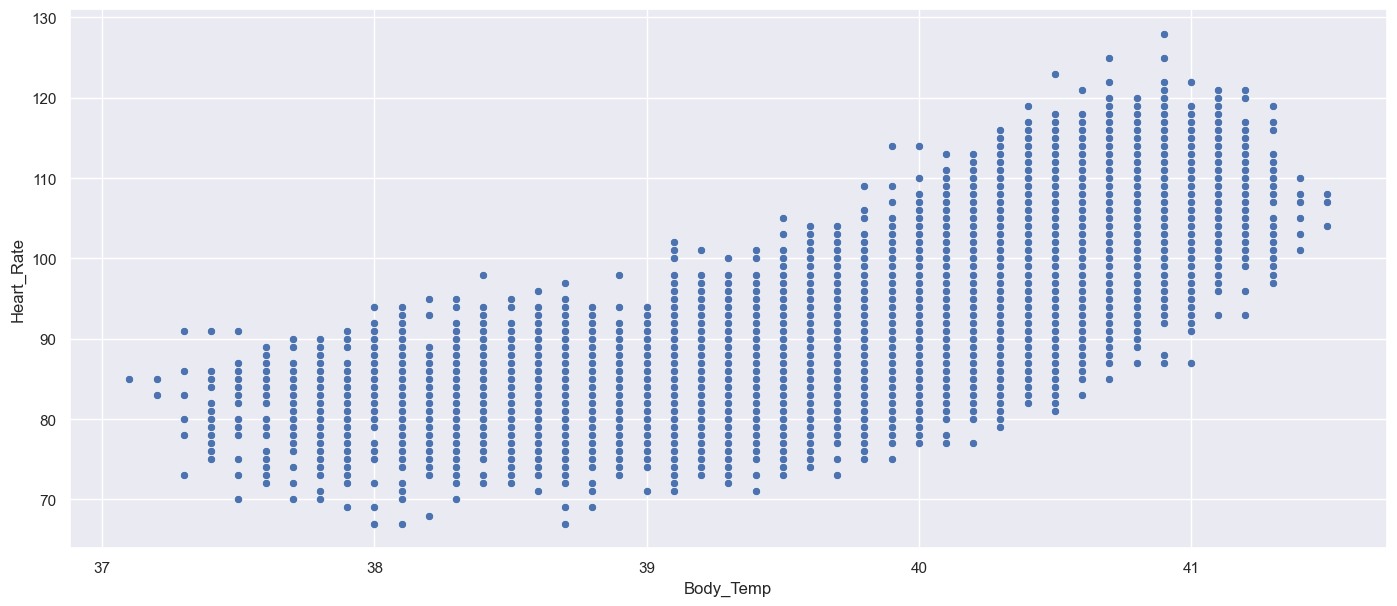

In [206]:
#scatterplot showing relationship between heart rate and body temperature
plt.subplots(figsize = (17,7))
sns.set(style='darkgrid')
sns.scatterplot(y=df['Heart_Rate'],x=df['Body_Temp'])
plt.show()

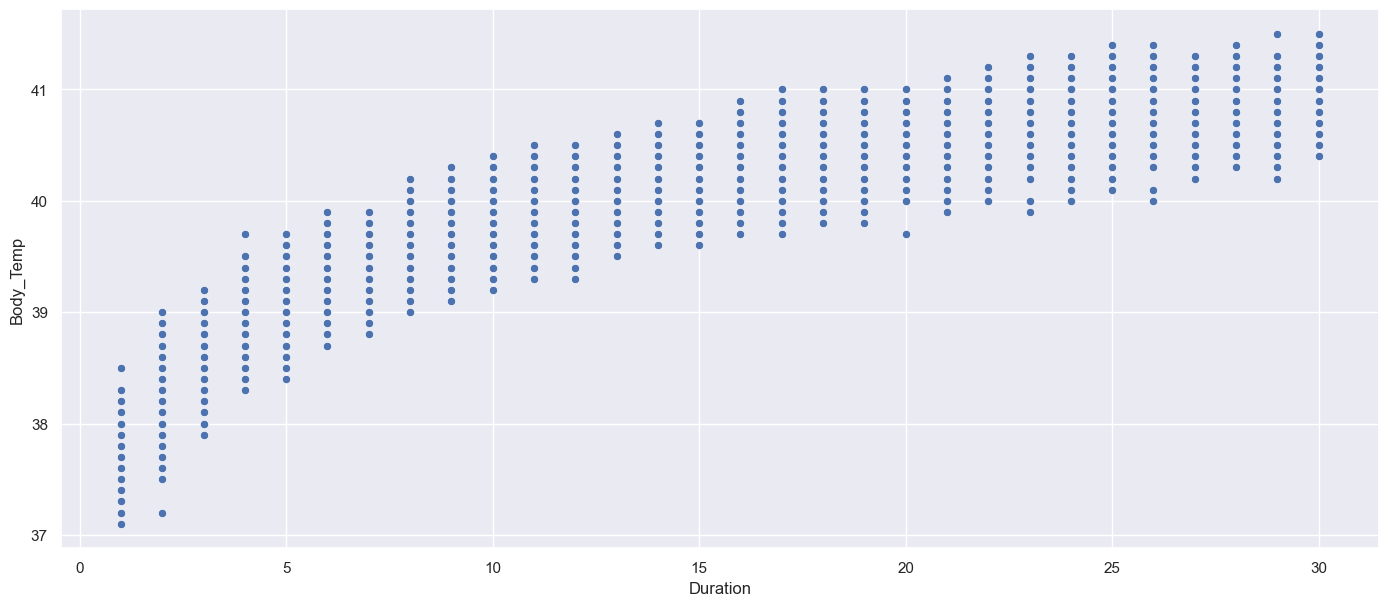

In [207]:
#scatterplot showing relationship between duration of exercise and body temperature 
plt.subplots(figsize = (17,7))
sns.set(style='darkgrid')
sns.scatterplot(x=df['Duration'],y=df['Body_Temp'])
plt.show()

In [208]:
gender = df['Gender'].value_counts()

In [209]:
#pie chart showing gender
fig = go.Figure(data=[go.Pie(labels=gender.index,values=gender.values,hoverinfo='label+percent')])
fig.show()

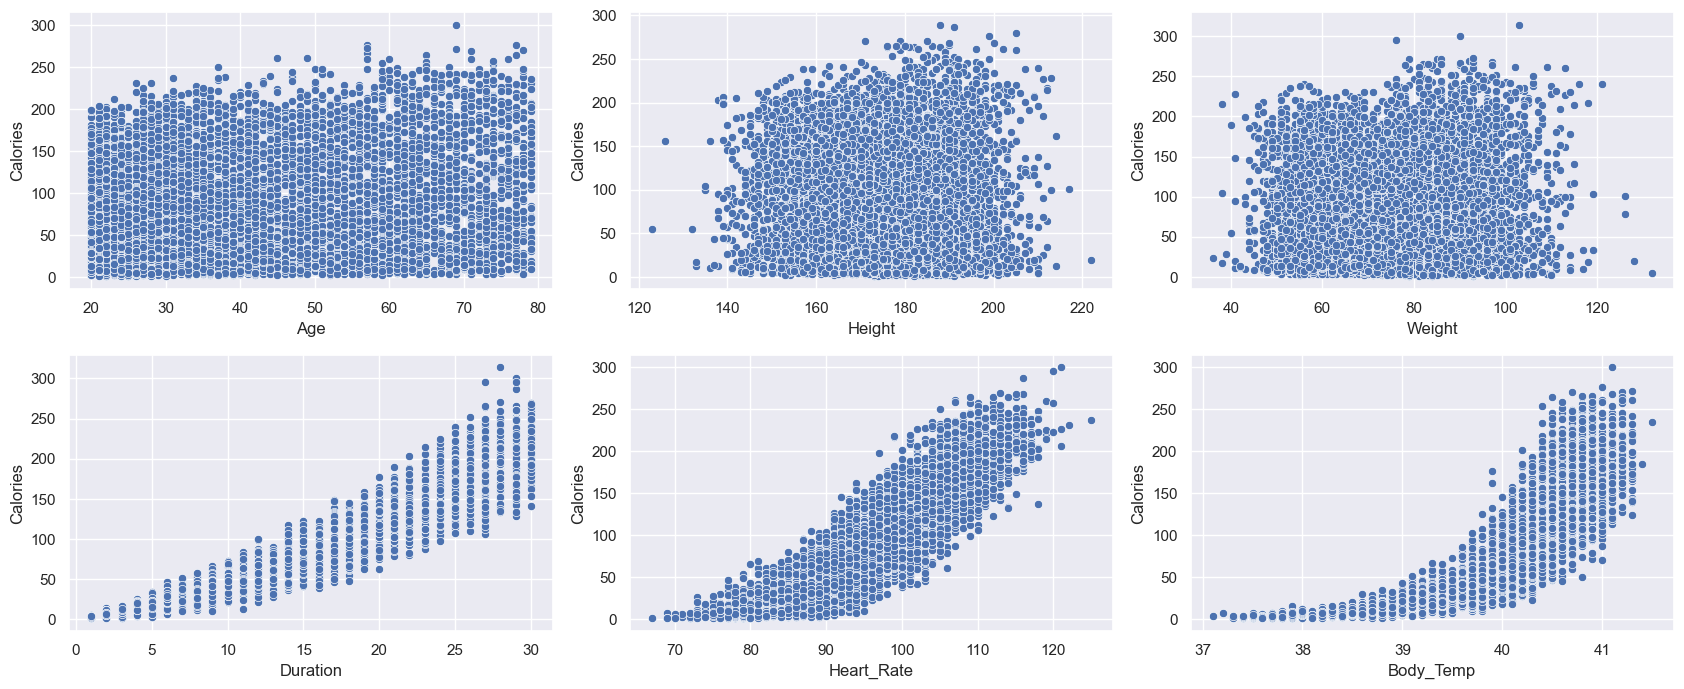

In [210]:
features = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp']
plt.subplots(figsize = (17,10))
for i, col in enumerate(features):
    plt.subplot(3,3,i+1)
    x=df.sample(7000)
    sns.scatterplot(x=x[col],y=x['Calories'])
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Gender-Age Distribution')

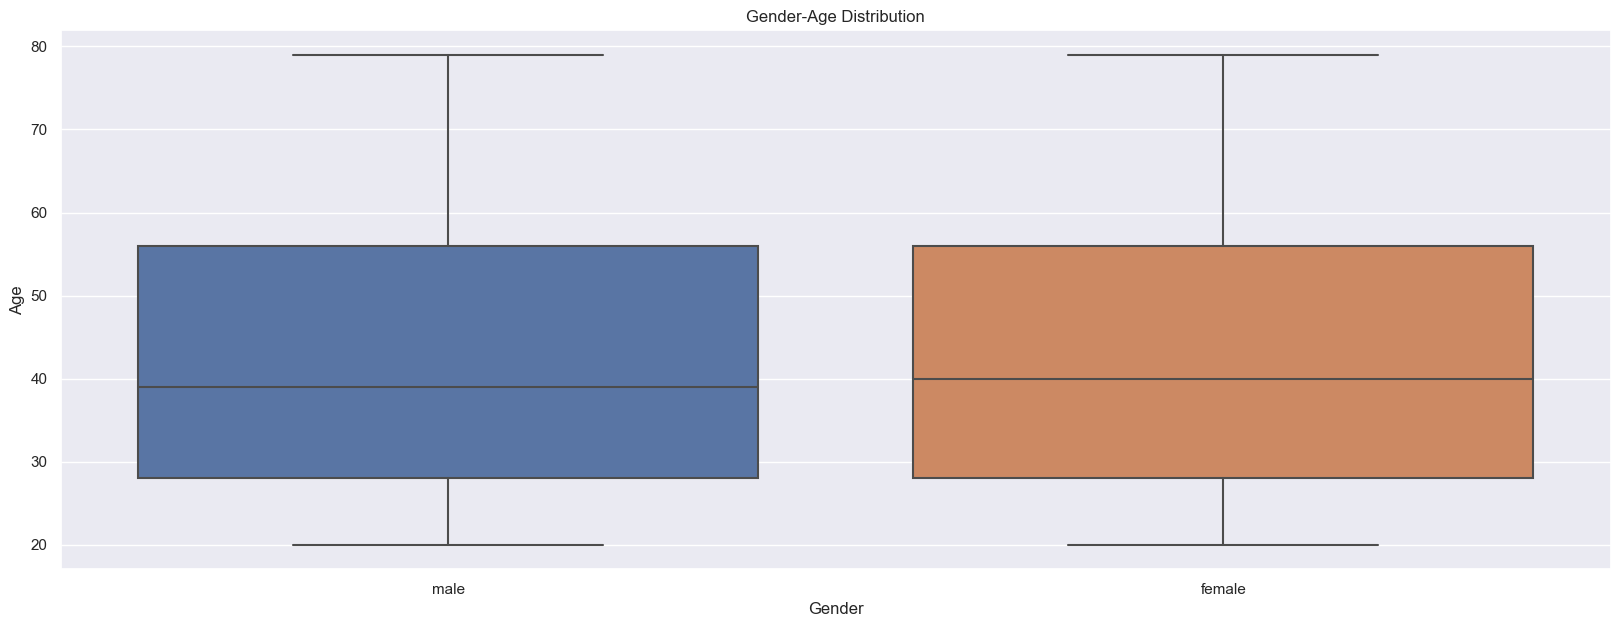

In [211]:
#boxplot showing gende-age distribution
plt.figure(figsize=(20,7))
sns.boxplot(data=df,y='Age',x='Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Gender-Age Distribution')

Text(0.5, 1.0, 'Gender-Height Distribution')

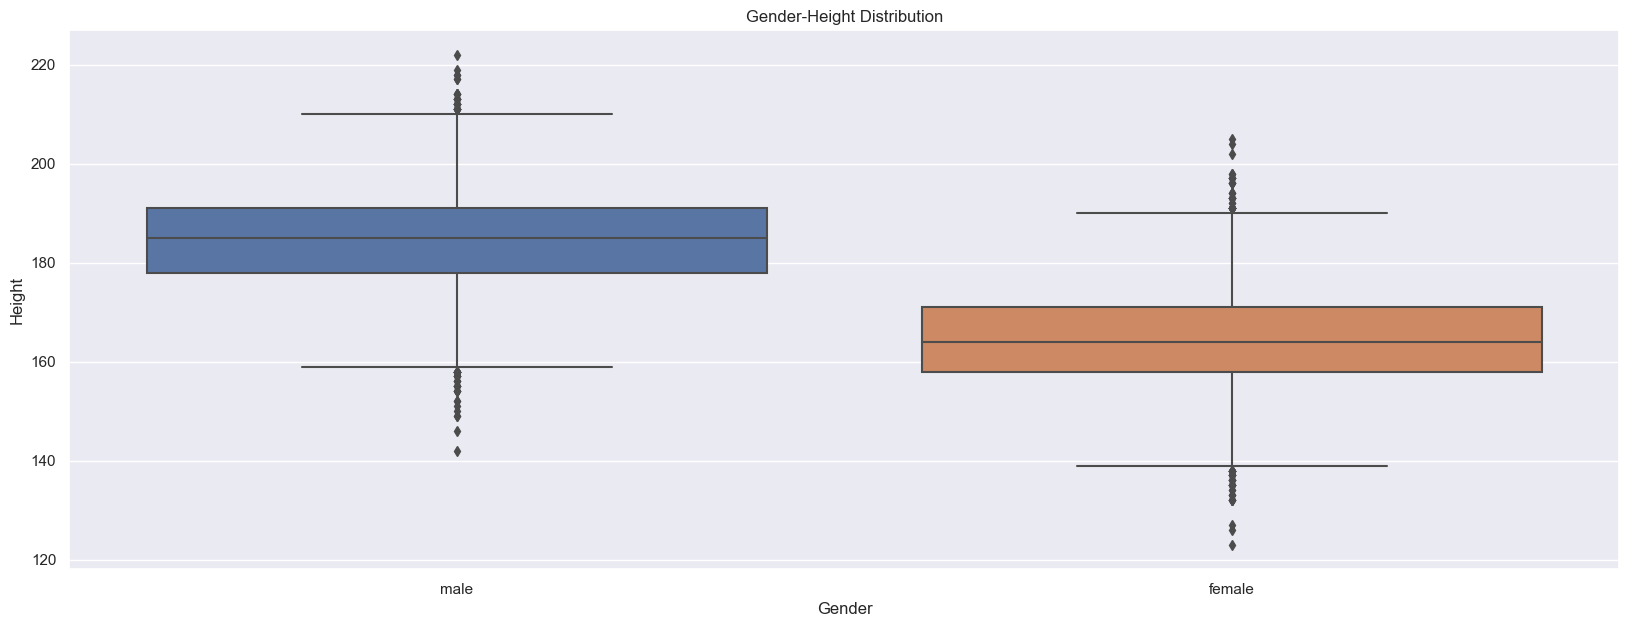

In [212]:
#boxplot showing gender-height distribution
plt.figure(figsize=(20,7))
sns.boxplot(data=df,y='Height',x='Gender')
plt.xlabel('Gender')
plt.ylabel('Height')
plt.title('Gender-Height Distribution')

Text(0.5, 1.0, 'Gender-Weight Distribution')

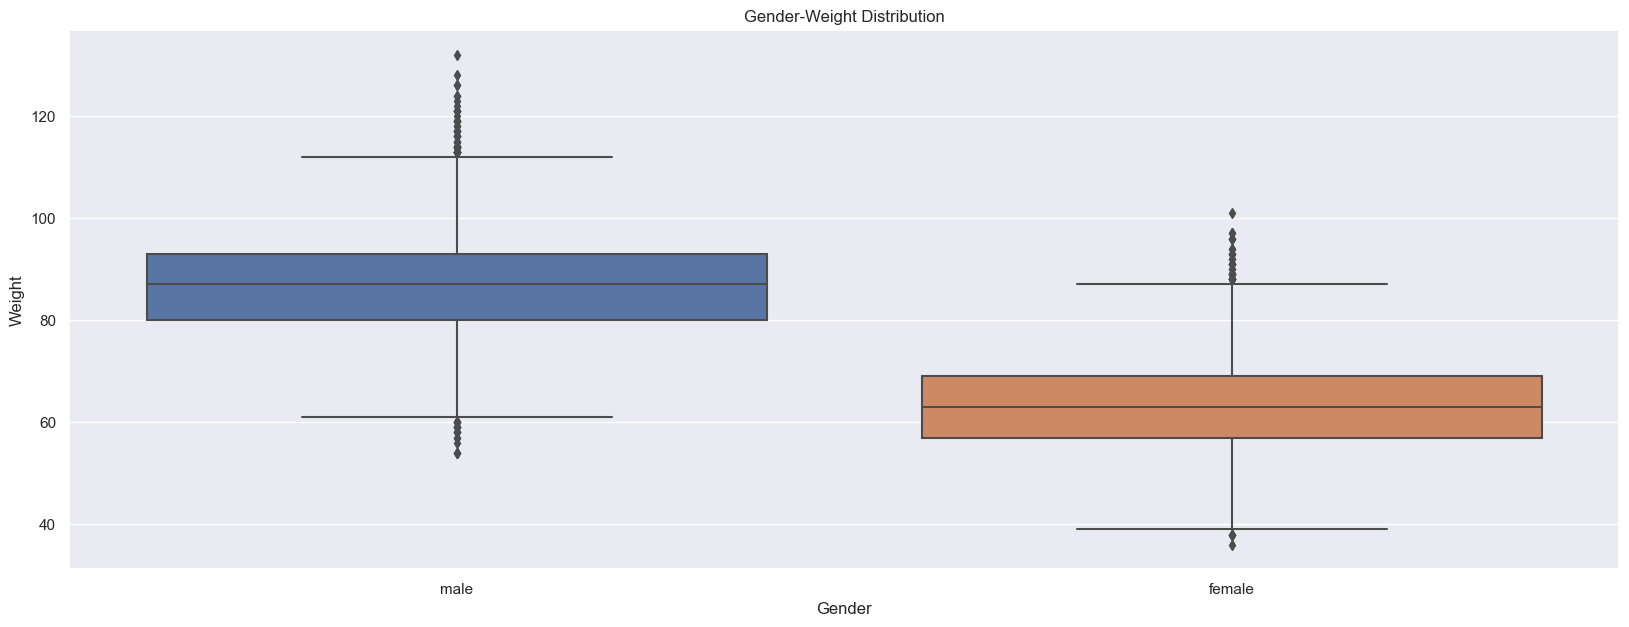

In [213]:
#boxplot showing gender-weight distribution
plt.figure(figsize=(20,7))
sns.boxplot(data=df,y='Weight',x='Gender')
plt.xlabel('Gender')
plt.ylabel('Weight')
plt.title('Gender-Weight Distribution')

# Feature Engineering

In [214]:
#encoding gender feature
df.replace({'male':0,'female':1}, inplace=True)
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [215]:
#correlations among features in dataset
correlation = df.corr()
print(correlation['Calories'].sort_values(ascending=False))

Calories      1.000000
Duration      0.955421
Heart_Rate    0.897882
Body_Temp     0.824558
Age           0.154395
Weight        0.035481
Height        0.017537
Gender       -0.022357
Name: Calories, dtype: float64


<AxesSubplot:>

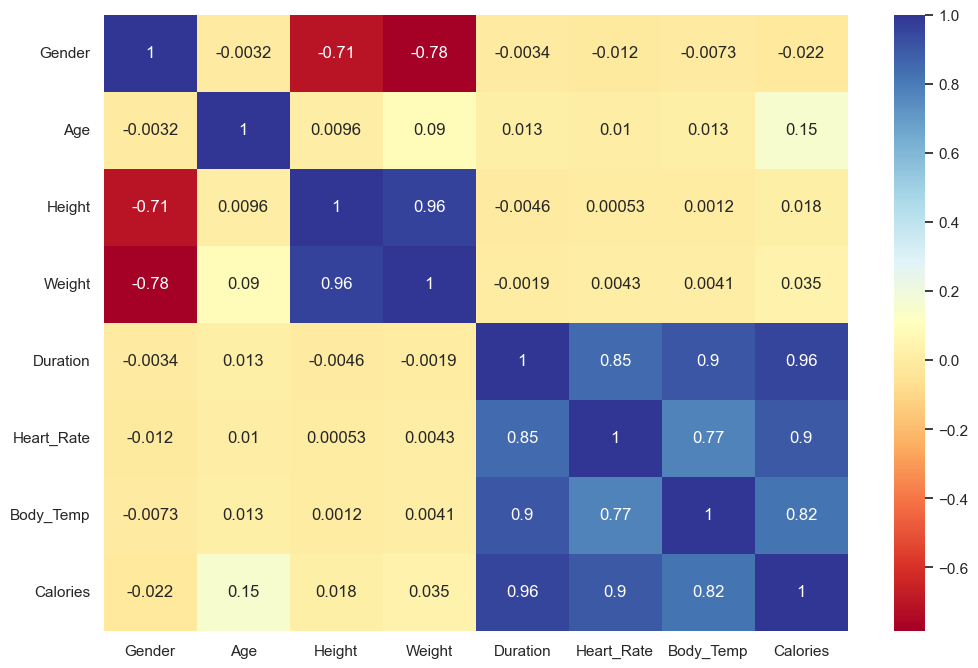

In [216]:
#heatmap of correlations in dataset
plt.figure(figsize = (12,8))
sns.heatmap(correlation, annot=True,cmap='RdYlBu')

In [217]:
#dropping highly correlated features
highly_correlated_columns = ['Duration','Height','Body_Temp']
df.drop(highly_correlated_columns,axis=1,inplace=True)

<AxesSubplot:>

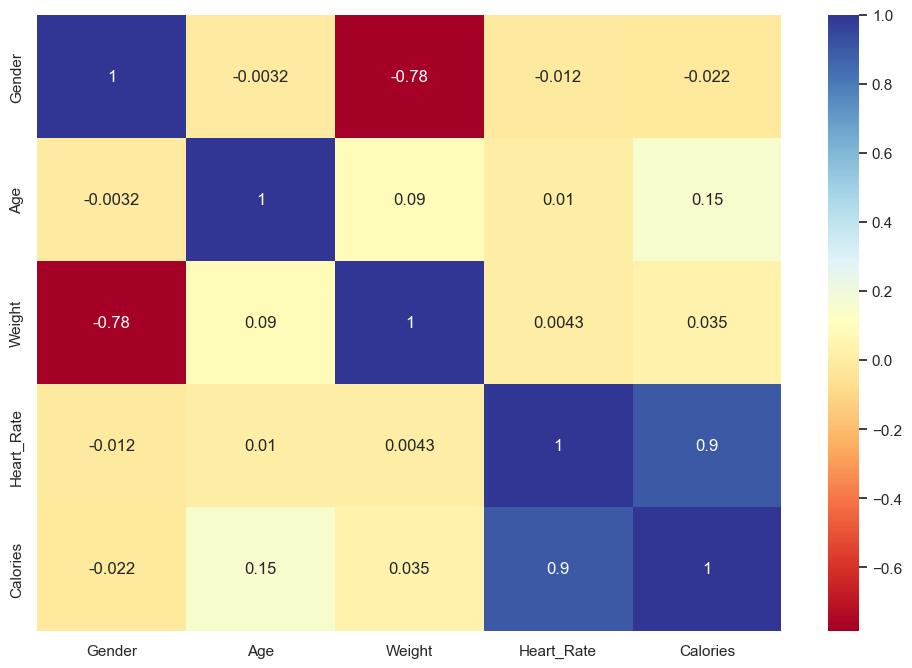

In [218]:
#heatmap of correlations in dataset
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot=True,cmap='RdYlBu')

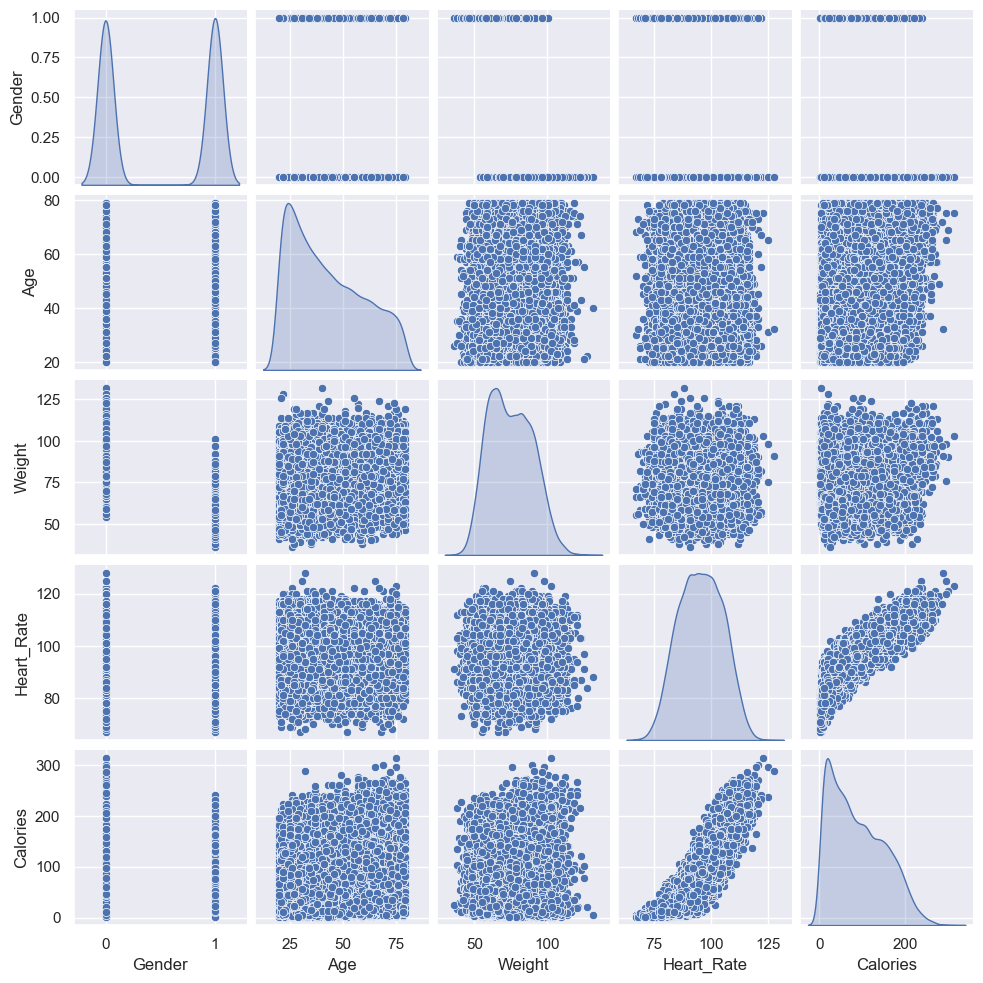

In [219]:
#pairplot showing relationship between features
sns.set()
columns = df.columns
sns.pairplot(df[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

In [220]:
# Defining the target & predictor variables
X = df.drop('Calories',axis=1) 
y=df['Calories'].values

In [221]:
# Splitting the dataframe into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((10500, 4), (4500, 4))

In [222]:
#scaling test data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [226]:
# Defining a helper function to fit models to data and score them
models = [LinearRegression(), Ridge(),Lasso(),ElasticNet(),RandomForestRegressor(),LGBMRegressor(),XGBRegressor()]
for i in range(7):
    models[i].fit(X_train,y_train)
    print(f'{models[i]} :')
    
    test_pred = models[i].predict(X_test)
    print('MAE :', MAE(y_test,test_pred))
    print('R2_Score ',r2_score(y_test,test_pred))
    print('RMSE ',np.sqrt(MSE(y_test,test_pred)))
    print("----- ----- ----- ----- ------  -----", "\n") 

    display()

LinearRegression() :
MAE : 20.674494800214916
R2_Score  0.8285989949608883
RMSE  26.01134476195874
----- ----- ----- ----- ------  ----- 

Ridge() :
MAE : 20.674555320226666
R2_Score  0.8285987459405988
RMSE  26.011363657268745
----- ----- ----- ----- ------  ----- 

Lasso() :
MAE : 20.712300423426445
R2_Score  0.8273666281545106
RMSE  26.104687576921208
----- ----- ----- ----- ------  ----- 

ElasticNet() :
MAE : 26.271618487618642
R2_Score  0.732586826169584
RMSE  32.48983625612543
----- ----- ----- ----- ------  ----- 

RandomForestRegressor() :
MAE : 19.074143848324518
R2_Score  0.8422198761406312
RMSE  24.956419065118713
----- ----- ----- ----- ------  ----- 

LGBMRegressor() :
MAE : 17.65730240464416
R2_Score  0.8664145761939731
RMSE  22.96337191040306
----- ----- ----- ----- ------  ----- 

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_catego